# Coursera Courses Dataset Analysis

**Goal of this Analysis**  
This notebook explores and analyzes Coursera course data, focusing on:
1. Data cleaning (duplicates, missing values, outliers)
2. Exploratory Data Analysis (EDA) using **Pandas**, **Matplotlib**, **Seaborn**, and **Plotly**
3. Insights and possible recommendations for further study

**Dataset**: [Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset).  

We'll look at features such as:
- Course rating
- Number of students enrolled
- Difficulty level
- Organization or University providing the course
- And more...

By the end, we hope to uncover patterns in course popularity, ratings, and potential relationships between different features.


## Imports and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Display plots inline
%matplotlib inline

# Seaborn style
sns.set_style("whitegrid")


## Data Loading

### Overview of the Datasets Feature description
| **Column**                     | **Description**                                                         |
|-------------------------------|-------------------------------------------------------------------------|
| Unnamed | A unique identifier for each course entry in the dataset.               |
| course_title                  | Contains the course title.                                               |
| course_organization           | Tells which organization is conducting the courses.                      |
| course_Certificate_type       | Details about the different certifications available in the courses.     |
| course_rating                 | The course rating (numeric or categorical rating).                       |
| course_difficulty             | The difficulty level or learning level of the course.                    |
| course_students_enrolled      | Number of students that are enrolled in the course.                      |


In [2]:
df = pd.read_csv("C:/JupyterNotebooks/datasets/coursea_data.csv")
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Basic Exploration, Data Cleaning and Transformation
### Here we take a look at the dataset and the statistics of it and notice a few problems:
- The First problem we have is that the Feature: **"course_students_enrolled"** is an Object and not an int64 data type. Since it represents integer values as an String, we will convert it into int64 data type, so we could easier analyse the numeric values of the feature
- The dataset contains a **"Unnamed: 0"** column which has various integer values in it, Since it doesnt give us any Information it will be removed

In [3]:
df.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

df.describe()

Number of rows: 891
Number of columns: 7


,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


### Removing the "Unnamed: 0" Column from the Dataset

In [5]:
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)
    
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Converting "course_students_enrolled" String into an Integer data type

In [6]:
def parse_enrollment(value: str) -> int:
    val = value.strip().lower()
    if val.endswith('k'):
        num = float(val.replace('k', ''))
        return int(num * 1000)
    elif val.endswith('m'):
        num = float(val.replace('m', ''))
        return int(num * 1000000)
    else:
        return int(float(val))
df["course_students_enrolled"] = df["course_students_enrolled"].apply(parse_enrollment)

In [7]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### Checking again the Statistics of 2 Numeric Features
- **Course rating** has a a min value of **"3.3"**, the max value is **"5"**, this tells us that there arent any 1 and 2 star ratings, so there were absolutely no students that were completely unsatisfied with the courses. The mean value of the ratings is **~4.7** which indicates that most of the students give a high rating for the courses, thats a pretty good considering 5 is the max rating.
- **Students Enrolled** The average number of enrollments per course is about 90.552k, but it can go as high as 3.2 million. This large range and high standard deviation (~181.937k) suggest there are some courses with extremely high enrollments and many that are more modest.

In [8]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


### Dataset Features
- The Dataset contains **4 Categorical Features** and **2 Numeric Features** after the convertion of "course_students_enrolled"

In [9]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object

## Checking Duplicates, Missing Values and Outliers

- Checking for Duplicates and droping them if any found. None was found.

In [10]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    # If duplicates found, will drop them:
    df.drop_duplicates(inplace=True)
    print("Duplicates dropped.")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


- Checking for missing values. None found

In [11]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


### Checking Outliers
- There are **17** Outliers in **"course_rating"** but the all tend to be in the lower end of the ratings, where the minimum is 3.3. The whole rating distribution once again confirms that students tend to rate all the courses very good between 4.25 and 5 rating.
- **"course_students_enrolled"** has **78** Outliers where the **highest Outlier** has the value of **3.2 Million**, this pretty impressive for a course to have so many enrolled students. because of such high Outliers the Boxplot chart is compressed and not as pleasing to look at, but still shows important distribution in the dataset.

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 1. Outlier Detection (IQR Method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers detected in {col}: {len(outliers)}")

# 2. Individual Boxplots for Each Numeric Column (Plotly)
for col in numeric_cols:
    fig = px.box(
        df,
        y=col,
        title=f"Boxplot of {col}",
        template="plotly_white"
    )
    fig.update_layout(
        width=600,
        height=600
    )
    fig.show()

Outliers detected in course_rating: 17
Outliers detected in course_students_enrolled: 78


## Exploratory Data Analysis
- Now we dive into analyzing the data using visualizations from Matplotlib, Seaborn, and Plotly.

## 

### Distribution of Ratings

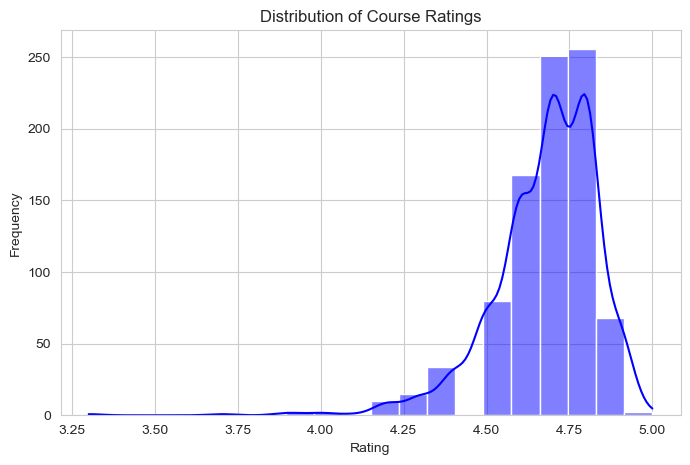

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['course_rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Top 10 Organizations with the Most Courses

In [19]:
org_grouped = (
    df.groupby("course_organization")
      .agg(
          num_courses=("course_title", "count"),
          total_enrolled=("course_students_enrolled", "sum")
      )
      .reset_index()
      .sort_values("num_courses", ascending=False)
      .head(10)  # top 10 organizations by course count
)

# 2) Build the figure
fig_org = go.Figure()

# Bar for number of courses (left y-axis)
fig_org.add_trace(
    go.Bar(
        name='Number of Courses',
        x=org_grouped['course_organization'],
        y=org_grouped['num_courses'],
        offsetgroup=1,
        marker_color='steelblue'
    )
)

# Bar for total enrolled (right y-axis)
fig_org.add_trace(
    go.Bar(
        name='Total Enrolled',
        x=org_grouped['course_organization'],
        y=org_grouped['total_enrolled'],
        offsetgroup=2,
        yaxis='y2',
        marker_color='seagreen'
    )
)

# 3) Configure Layout
fig_org.update_layout(
    template='plotly_white',
    title='Top 10 Organizations by Number of Courses & Enrollment',
    barmode='group',
    width=950,
    height=600,
    
    # Rotate x-axis labels to handle long names
    xaxis=dict(
        domain=[0.15, 0.85],
        title='Organization',
        tickangle=-45   # tilt labels 45 degrees to avoid overlap
    ),
    
    # Left y-axis: number of courses
    yaxis=dict(
        title='Number of Courses',
        titlefont=dict(color='steelblue'),
        tickfont=dict(color='steelblue')
    ),
    
    # Right y-axis: total enrolled
    yaxis2=dict(
        title='Total Enrolled',
        titlefont=dict(color='seagreen'),
        tickfont=dict(color='seagreen'),
        overlaying='y',
        side='right',
        anchor='free',
        position=0.85
    ),
    
    # Place the legend on the right side
    legend=dict(
        orientation='v',      # vertical legend
        x=1.02,               # push legend slightly to the right
        y=1,                  # top-align the legend
        xanchor='left',
        yanchor='top'
    ),
    
    # Add extra bottom margin so the rotated labels don't get cut off
    margin=dict(b=100)
)

fig_org.show()

### Courses vs Enrollments

In [ ]:

grouped = (
    df.groupby("course_difficulty")
      .agg(
          num_courses=("course_title", "count"),
          total_enrolled=("course_students_enrolled", "sum")
      )
      .reset_index()
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        name='Number of Courses',
        x=grouped['course_difficulty'],
        y=grouped['num_courses'],
        offsetgroup=1,          # Ensure it sits side by side, not overlapping
        marker_color='steelblue'
    )
)

fig.add_trace(
    go.Bar(
        name='Total Enrolled',
        x=grouped['course_difficulty'],
        y=grouped['total_enrolled'],
        offsetgroup=2,          # Different offset group, so it aligns side by side
        yaxis='y2',             # Ties this bar to the second y-axis
        marker_color='seagreen'
    )
)

fig.update_layout(
    template='plotly_white',
    title='Courses vs. Enrollments by Difficulty',
    barmode='group',             # Grouped bars (not stacked)
    width=950,
    height=600,
    
    # The x-axis domain goes from 0.15 to 0.85 so there's room on the right
    # for the second y-axis. Adjust if needed.
    xaxis=dict(
        domain=[0.15, 0.85],
        title='Difficulty'
    ),
    
    # Left y-axis: number of courses
    yaxis=dict(
        title='Number of Courses',
        titlefont=dict(color='steelblue'),
        tickfont=dict(color='steelblue')
    ),
    
    # Right y-axis: total enrolled
    yaxis2=dict(
        title='Total Enrolled',
        titlefont=dict(color='seagreen'),
        tickfont=dict(color='seagreen'),
        overlaying='y',         # Overlay on the same plot area
        side='right',           # Place ticks on the right
        anchor='free',          # "Free" axis positioning
        position=0.85           # Position it near the right edge
    ),
    
    legend=dict(
        orientation='h',
        y=-0.2,
        x=0.5,
        xanchor='center'
    )
)

fig.show()


### Top 10 Courses

In [ ]:

top_10 = (
    df.sort_values(by="course_students_enrolled", ascending=False)
      .head(10)
)

fig = px.bar(
    top_10,
    x="course_students_enrolled",
    y="course_title",
    orientation="h",
    title="Top 10 Most Enrolled Courses",
    color="course_students_enrolled",                    # Color by enrollment
    color_continuous_scale=px.colors.sequential.Viridis, # A vibrant scale without white highlights
    text="course_students_enrolled"                      # Numeric labels on bars
)

fig.update_layout(
    template="plotly_white",    
    width=1500,                 
    height=700,                
    title_font=dict(size=20),
    xaxis_title="Number of Enrolled Students",
    yaxis_title="",
    yaxis=dict(autorange="reversed"),
    coloraxis_showscale=False,   # Hide color legend if you prefer
    margin=dict(l=150, r=50, t=80, b=50)  
)

fig.update_layout(title_x=0.5)

fig.update_traces(
    textposition="outside",
    texttemplate="%{x:,.0f}"     # e.g. "3,200,000" with commas
)

fig.show()

### Avarage Course Ratings compared across Difficulty

In [ ]:
grouped_rating = (
    df.groupby("course_difficulty")
      .agg(
          avg_rating=("course_rating", "mean"),     # average course rating
          num_courses=("course_title", "count")     # how many courses
      )
      .reset_index()
)

fig_rating = go.Figure()

fig_rating.add_trace(
    go.Bar(
        name='Avg Rating',
        x=grouped_rating['course_difficulty'],
        y=grouped_rating['avg_rating'],
        offsetgroup=1,
        marker_color='steelblue'
    )
)

fig_rating.add_trace(
    go.Bar(
        name='Number of Courses',
        x=grouped_rating['course_difficulty'],
        y=grouped_rating['num_courses'],
        offsetgroup=2,
        yaxis='y2',
        marker_color='seagreen'
    )
)

fig_rating.update_layout(
    template='plotly_white',
    title='Average Rating vs. Number of Courses by Difficulty',
    barmode='group',
    width=950,
    height=600,
    xaxis=dict(
        domain=[0.15, 0.85],
        title='Difficulty'
    ),
    yaxis=dict(
        title='Average Rating',
        titlefont=dict(color='steelblue'),
        tickfont=dict(color='steelblue')
    ),
    yaxis2=dict(
        title='Number of Courses',
        titlefont=dict(color='seagreen'),
        tickfont=dict(color='seagreen'),
        overlaying='y',
        side='right',
        anchor='free',
        position=0.85
    ),
    legend=dict(
        orientation='h',
        y=-0.2,
        x=0.5,
        xanchor='center'
    )
)

fig_rating.show()

### Certificate Types compared by Difficulty

In [ ]:
fig_stack = px.histogram(
    df,
    x="course_difficulty",
    color="course_Certificate_type",
    barmode='stack',
    template='plotly_white',
    title='Certificate Types Offered by Difficulty',
    width=950,
    height=600
)
fig_stack.update_layout(xaxis_title='Difficulty', yaxis_title='Number of Courses')
fig_stack.show()

### Enrollments compared to Certificate Types

In [ ]:
cert_grouped = (
    df.groupby("course_Certificate_type")
      .agg(total_enrolled=("course_students_enrolled", "sum"))
      .reset_index()
      .sort_values("total_enrolled", ascending=False)
)
fig = px.bar(
    cert_grouped,
    x="course_Certificate_type",
    y="total_enrolled",
    color="course_Certificate_type",     # Assign a distinct color per certificate type
    barmode='stack',                     # Same stacking mode as your histogram code
    template='plotly_white',
    title='Total Enrollment by Certificate Type',
    width=950,
    height=600,
    text="total_enrolled"               # Display enrollment numbers on each bar
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title="Certificate Type",
    yaxis_title="Number of Enrollments",
    showlegend=True  # Keep legend so each color is identified
)

fig.show()


### Correlation Heatmap (Numeric Columns)

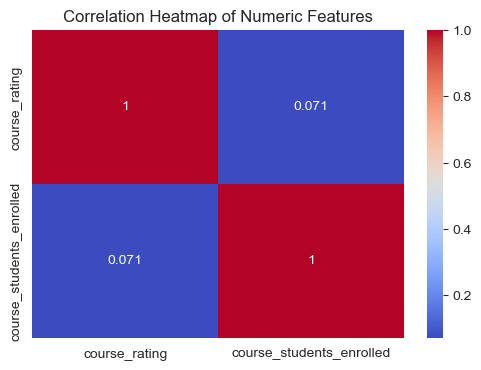

In [16]:
plt.figure(figsize=(6,4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Conclusions

## Ideas for Improvements